#1. 흐름 이해하기

## 1.1 전체 흐름 이해

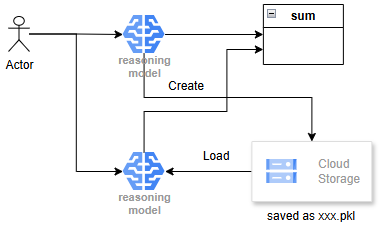

## 1.2 LangchainAgent 동작 이해

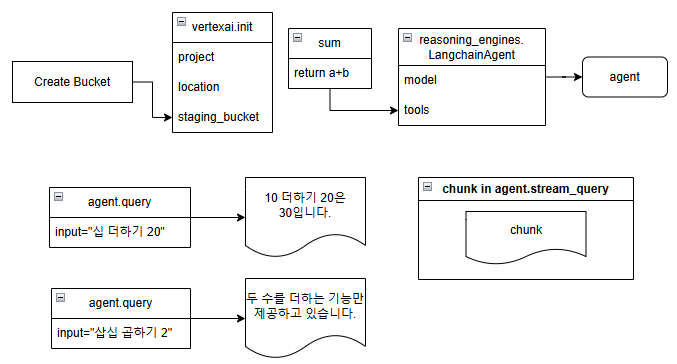

## 1.3 배포

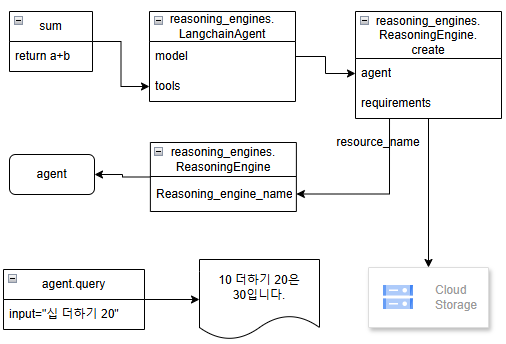

## 1.4 model 가져오기

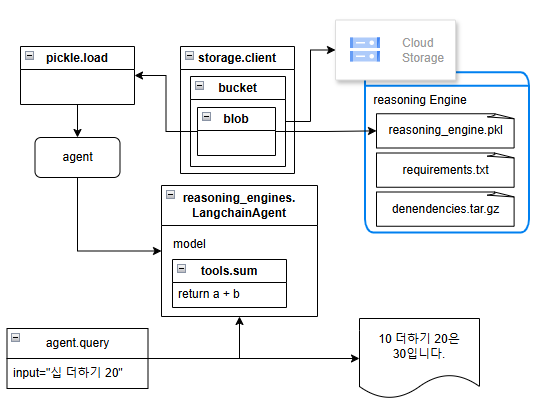

# 2. 코드 이해하기

## 2.1 초기화

### 2.1.1 라이브러리 설치

In [ ]:
!pip install --upgrade --quiet \
    "google-cloud-aiplatform[langchain,reasoningengine]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.1/414.1 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.4/151.4 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.2 MB/s eta 0:00:00


In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### 2.1.2 환경변수 설정 및 vertexai 초기화

In [ ]:
import os

PROJECT_ID = os.environ.get("GOOGLE_CLOUD_PROJECT")
LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")
STAGING_BUCKET=f"gs://jin62-staging-{PROJECT_ID}"
STAGING_BUCKET

'gs://jin62-staging-gemini-demo-450807'

In [ ]:
!gcloud storage buckets create $STAGING_BUCKET

Creating gs://jin62-staging-gemini-demo-450807/...


In [ ]:
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION, staging_bucket=STAGING_BUCKET)

## 2.2 함수 제작

In [ ]:
def sum(a: int, b: int):
  """
  두 수를 입력받아 더하는 함수 입니다.
  """
  return a+b

In [ ]:
sum(10, 20)

30

## 2.3 Reasoning Engine

### 2.3.1 Engine 생성

In [ ]:
from vertexai.preview import reasoning_engines

In [ ]:
agent = reasoning_engines.LangchainAgent(
    "gemini-2.0-flash",
    tools=[sum],
)

## 2.3.2 Query

In [ ]:
agent.query(input="십 더하기 20")

{'input': '십 더하기 20', 'output': '10 더하기 20은 30입니다.\n'}

In [ ]:
agent.query(input="십에 30을 추가하면")

{'input': '십에 30을 추가하면', 'output': '40'}

In [ ]:
agent.query(input="20 빼기 오")

{'input': '20 빼기 오',
 'output': '20에서 5를 빼는 것은 덧셈으로 표현하면 20 + (-5)와 같습니다. 어떤 두 수를 더해드릴까요?\n'}

In [ ]:
agent.query(input="삽십 곱하기 2")

{'input': '삽십 곱하기 2', 'output': '두 수를 더하는 기능만 제공하고 있습니다. 곱하기 기능은 없습니다.'}

### 2.3.3 stream_query 이해

In [ ]:
from IPython.display import display, Markdown
from pprint import pprint

message_types = {"actions": "Action", "messages": "Message", "output": "Output"}
for chunk in agent.stream_query(
    input="이십 더하기 삼 더하기 오?"
):
    for key, label in message_types.items():
        if key in chunk:
            display(Markdown("\n---\n"))
            display(Markdown(f"{label}:"))
            display(Markdown(""))

            if type(chunk[key]) == list:
                for item in chunk[key]:
                  pprint(item)
            else:
              display(Markdown(f"{chunk[key]}"))


---


Action:

{'id': ['langchain', 'schema', 'agent', 'ToolAgentAction'],
 'kwargs': {'log': "\nInvoking: `sum` with `{'a': 20.0, 'b': 3.0}`\n\n\n",
            'message_log': [{'id': ['langchain',
                                    'schema',
                                    'messages',
                                    'AIMessageChunk'],
                             'kwargs': {'additional_kwargs': {'function_call': {'arguments': '{"a": '
                                                                                             '20.0, '
                                                                                             '"b": '
                                                                                             '3.0}',
                                                                                'name': 'sum'}},
                                        'content': '',
                                        'id': 'run-8ee636f4-02fd-4cf2-9588-65216b383174',
                   


---


Message:

{'id': ['langchain', 'schema', 'messages', 'AIMessageChunk'],
 'kwargs': {'additional_kwargs': {'function_call': {'arguments': '{"a": 20.0, '
                                                                 '"b": 3.0}',
                                                    'name': 'sum'}},
            'content': '',
            'id': 'run-8ee636f4-02fd-4cf2-9588-65216b383174',
            'invalid_tool_calls': [],
            'response_metadata': {'finish_reason': 'STOP',
                                  'safety_ratings': []},
            'tool_call_chunks': [{'args': '{"a": 20.0, "b": 3.0}',
                                  'id': 'b1a3a327-8778-463b-ab65-24295fcfe288',
                                  'index': None,
                                  'name': 'sum',
                                  'type': 'tool_call_chunk'}],
            'tool_calls': [{'args': {'a': 20.0, 'b': 3.0},
                            'id': 'b1a3a327-8778-463b-ab65-24295fcfe288',
                           


---


Message:

{'id': ['langchain', 'schema', 'messages', 'FunctionMessage'],
 'kwargs': {'content': '23', 'name': 'sum', 'type': 'function'},
 'lc': 1,
 'type': 'constructor'}



---


Action:

{'id': ['langchain', 'schema', 'agent', 'ToolAgentAction'],
 'kwargs': {'log': "\nInvoking: `sum` with `{'a': 23.0, 'b': 5.0}`\n\n\n",
            'message_log': [{'id': ['langchain',
                                    'schema',
                                    'messages',
                                    'AIMessageChunk'],
                             'kwargs': {'additional_kwargs': {'function_call': {'arguments': '{"a": '
                                                                                             '23.0, '
                                                                                             '"b": '
                                                                                             '5.0}',
                                                                                'name': 'sum'}},
                                        'content': '',
                                        'id': 'run-615d5f99-6cfb-4908-a2bf-4ef93d963e21',
                   


---


Message:

{'id': ['langchain', 'schema', 'messages', 'AIMessageChunk'],
 'kwargs': {'additional_kwargs': {'function_call': {'arguments': '{"a": 23.0, '
                                                                 '"b": 5.0}',
                                                    'name': 'sum'}},
            'content': '',
            'id': 'run-615d5f99-6cfb-4908-a2bf-4ef93d963e21',
            'invalid_tool_calls': [],
            'response_metadata': {'finish_reason': 'STOP',
                                  'safety_ratings': []},
            'tool_call_chunks': [{'args': '{"a": 23.0, "b": 5.0}',
                                  'id': '8096d4e9-acdc-4994-8aec-2de3af3a9c61',
                                  'index': None,
                                  'name': 'sum',
                                  'type': 'tool_call_chunk'}],
            'tool_calls': [{'args': {'a': 23.0, 'b': 5.0},
                            'id': '8096d4e9-acdc-4994-8aec-2de3af3a9c61',
                           


---


Message:

{'id': ['langchain', 'schema', 'messages', 'FunctionMessage'],
 'kwargs': {'content': '28', 'name': 'sum', 'type': 'function'},
 'lc': 1,
 'type': 'constructor'}



---


Message:

{'id': ['langchain', 'schema', 'messages', 'AIMessage'],
 'kwargs': {'content': '28입니다.\n',
            'invalid_tool_calls': [],
            'tool_calls': [],
            'type': 'ai'},
 'lc': 1,
 'type': 'constructor'}



---


Output:

28입니다.


In [ ]:
for chunk in agent.stream_query(
    input="이십 더하기 삼 더하기 오?"
):
  try:
    pprint(chunk['messages'][0]['kwargs']['additional_kwargs'])
    pprint(chunk['messages'][0]['kwargs']['content'])
  except:
    pprint(chunk['messages'][0]['kwargs'])

{'function_call': {'arguments': '{"a": 20.0, "b": 3.0}', 'name': 'sum'}}
''
{'content': '23', 'name': 'sum', 'type': 'function'}
{'function_call': {'arguments': '{"a": 23.0, "b": 5.0}', 'name': 'sum'}}
''
{'content': '28', 'name': 'sum', 'type': 'function'}
{'content': '28입니다.\n',
 'invalid_tool_calls': [],
 'tool_calls': [],
 'type': 'ai'}


## 2.4 배포

### 2.4.1 agent 생성

In [ ]:
agent = reasoning_engines.LangchainAgent(
    "gemini-2.0-flash",
    tools=[sum]
)

In [ ]:
remote_agent = reasoning_engines.ReasoningEngine.create(
    agent,
    requirements=[
         "google-cloud-aiplatform[langchain,reasoningengine]"
    ]
)

INFO:vertexai.reasoning_engines._reasoning_engines:Using bucket jin62-staging-gemini-demo-450807
INFO:vertexai.reasoning_engines._reasoning_engines:Writing to gs://jin62-staging-gemini-demo-450807/reasoning_engine/reasoning_engine.pkl
INFO:vertexai.reasoning_engines._reasoning_engines:Writing to gs://jin62-staging-gemini-demo-450807/reasoning_engine/requirements.txt
INFO:vertexai.reasoning_engines._reasoning_engines:Creating in-memory tarfile of extra_packages
INFO:vertexai.reasoning_engines._reasoning_engines:Writing to gs://jin62-staging-gemini-demo-450807/reasoning_engine/dependencies.tar.gz
INFO:vertexai.reasoning_engines._reasoning_engines:Creating ReasoningEngine
INFO:vertexai.reasoning_engines._reasoning_engines:Create ReasoningEngine backing LRO: projects/741782101329/locations/us-central1/reasoningEngines/8086477013734391808/operations/7421721182753259520
INFO:vertexai.reasoning_engines._reasoning_engines:ReasoningEngine created. Resource name: projects/741782101329/locations/

### 2.4.2 Query

In [ ]:
remote_agent.resource_name

'projects/741782101329/locations/us-central1/reasoningEngines/8086477013734391808'

In [ ]:
remote_agent.resource_name.split("/")[-1]

'8086477013734391808'

In [ ]:
# ENGINE_PATH="projects/741782101329/locations/us-central1/reasoningEngines/6241267803907686400"
# remote_app = reasoning_engines.ReasoningEngine(ENGINE_PATH)
ENGINE_ID = f"{remote_agent.resource_name.split('/')[-1]}"
remote_app = reasoning_engines.ReasoningEngine(ENGINE_ID)

In [ ]:
response = remote_app.query(input="십 더하기 텐")
response

{'input': '십 더하기 ten',
 'output': '어떤 숫자를 더하시겠습니까? 영어 단어 "ten"을 숫자로 변환할 수 없습니다.'}

### 2.5 Reasoing Engine 삭제

In [ ]:
for re in reasoning_engines.ReasoningEngine.list():
  remote_app = reasoning_engines.ReasoningEngine(re.name)
  remote_app.delete()

INFO:google.cloud.aiplatform.base:Deleting ReasoningEngine : projects/gemini-demo-450807/locations/us-central1/reasoningEngines/8086477013734391808
INFO:google.cloud.aiplatform.base:ReasoningEngine deleted. . Resource name: projects/gemini-demo-450807/locations/us-central1/reasoningEngines/8086477013734391808
INFO:google.cloud.aiplatform.base:Deleting ReasoningEngine resource: projects/gemini-demo-450807/locations/us-central1/reasoningEngines/8086477013734391808
INFO:google.cloud.aiplatform.base:Delete ReasoningEngine backing LRO: projects/741782101329/locations/us-central1/operations/2057230339113222144
INFO:google.cloud.aiplatform.base:ReasoningEngine resource projects/gemini-demo-450807/locations/us-central1/reasoningEngines/8086477013734391808 deleted.


## 2.6 GCS에서 모델 연동하기

In [ ]:
from google.cloud import storage
import pickle

In [ ]:
def load_reasoning_engine_from_gcs(bucket_name: str, blob_name: str):
    """
    GCS에 저장된 pkl 파일을 로드하여 ReasoningEngine 객체를 반환합니다.
    """
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(blob_name)

    # pkl 파일 다운로드 및 로드
    with blob.open("rb") as f:
        loaded_engine = pickle.load(f)
    return loaded_engine

In [ ]:
BUCKET_NAME = "jin62-staging-gemini-demo-450807"  # 실제 버킷 이름으로 변경
BLOB_NAME = "reasoning_engine/reasoning_engine.pkl"  # 실제 pkl 파일 경로로 변경

In [ ]:
# ReasoningEngine 로드
loaded_engine = load_reasoning_engine_from_gcs(BUCKET_NAME, BLOB_NAME)

In [ ]:
# ReasoningEngine 사용
prompt = "삼과 4를 더하면?"
response = loaded_engine.query(input=prompt)
print(f"응답: {response}")

응답: {'input': '삼과 4를 더하면?', 'output': '3 더하기 4는 7입니다.\n'}


In [ ]:
# ReasoningEngine 사용
prompt = "10 곱하기 4?"
response = loaded_engine.query(input=prompt)
print(f"응답: {response}")

응답: {'input': '10 곱하기 4?', 'output': '두 수를 더하는 기능만 제공하고 있습니다. 어떤 두 수를 더하시겠습니까?'}


### 2.5.2 GCS 삭제

In [ ]:
!gcloud storage rm -r $STAGING_BUCKET

Removing objects:
Removing gs://jin62-staging-gemini-demo-450807/reasoning_engine/dependencies.tar.gz#1740446102915471...
Removing gs://jin62-staging-gemini-demo-450807/reasoning_engine/reasoning_engine.pkl#1740446102636959...
Removing gs://jin62-staging-gemini-demo-450807/reasoning_engine/requirements.txt#1740446102769210...
Removing buckets:
Removing gs://jin62-staging-gemini-demo-450807/...


# 3. Reference

* https://cloud.google.com/vertex-ai/generative-ai/docs/reference/python/latest/vertexai.preview.reasoning_engines.ReasoningEngine
* https://cloud.google.com/vertex-ai/generative-ai/docs/reasoning-engine/manage?hl=ko
* https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/reasoning-engine#generativeaionvertexai_get_reasoning_engine-python_vertex_ai_sdk

